In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os

# Disable tokenizers parallelism to avoid the warning
os.environ["TOKENIZERS_PARALLELISM"] = "false"

In [3]:
!pip install -q -U watermark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.2 MB/s eta 0:00:00


In [4]:
!pip install -qq transformers

## Data Exploration


In [5]:
import numpy as np
import pandas as pd

In [6]:
df_train = pd.read_csv("/content/train (2).csv")
df_train

,Unnamed: 0,Data,Label
0,0,মুগ্ধ হয়ে গেলাম মামু. আর তোমায় কি কমু. বলো তোম...,positive
1,1,এই কুত্তার বাচ্চাদের জন্য দেশটা আজ এমন অবস্তায়...,negative
2,2,ভাই আপনার কথাই যাদু রয়েছে,positive
3,3,উওরটা আমার অনেক ভাল লেগেছে,positive
4,4,আমার নিজের গাড়ী নিয়ে কি সাজেক যেতে পারবো না ?...,neutral
...,...,...,...
12570,12570,বর্ডারে অনেক লেট হয়ে যাওয়াতে আমরা জিপে করে চলে...,positive
12571,12571,আমার সোনার বাংলাতে এমন রক্ষক নামের ভক্ষকের কোন...,negative
12572,12572,ওনারা এত হাইজিনিক ও এত সুন্দর পরিবেশে রান্না ক...,positive
12573,12573,বাংলাদেশ আমরা পুলিশ চাই না এই ধরনে পুলিশ দরকার...,negative


In [7]:
df_val = pd.read_csv("/content/Validation.csv")
df_val

,Unnamed: 0,Data,Label
0,1,জি ভাইয়া পেয়েছি । ভালো থেকেন । আপনার ভিডিও গুল...,positive
1,2,ফাহিম ভাই আপনার বাসা কত নাম্বারে,neutral
2,3,এইটা যদি প্রথম সিজোন এর পর্ব হইত আমি নিশ্চিত আ...,positive
3,4,"ভাইজান সিলেট আসলেন , আর শাহাজালাল বিশ্ববিদ্যাল...",negative
4,5,মহিলাটা একটা ফাজিল । কথা বার্তা একটুখানিও ঠিক ...,negative
...,...,...,...
1929,1930,"শরীরটা ভালো না , সময়ও পাচ্ছি না :",neutral
1930,1931,আপনার ছেলেমেয়ের প্রতি খেয়াল রাখুন এটা আপনার দা...,neutral
1931,1932,"যাই হোক প্রশাসন হয়তো আপনাদের সাথে নাই , কিন্তু...",positive
1932,1933,পুলিশের চরিত্রের কথা কি আর বলবো,negative


# **Label	0, 1 or 2 . '0' for neutral, '1' for positive and '2' for negative**

In [8]:
df_train['Label'] = df_train['Label'].replace(['neutral', 'positive', 'negative'],[0, 1, 2])

df_val['Label'] = df_val['Label'].replace(['neutral', 'positive', 'negative'],[0, 1, 2])

In [9]:
df_train

,Unnamed: 0,Data,Label
0,0,মুগ্ধ হয়ে গেলাম মামু. আর তোমায় কি কমু. বলো তোম...,1
1,1,এই কুত্তার বাচ্চাদের জন্য দেশটা আজ এমন অবস্তায়...,2
2,2,ভাই আপনার কথাই যাদু রয়েছে,1
3,3,উওরটা আমার অনেক ভাল লেগেছে,1
4,4,আমার নিজের গাড়ী নিয়ে কি সাজেক যেতে পারবো না ?...,0
...,...,...,...
12570,12570,বর্ডারে অনেক লেট হয়ে যাওয়াতে আমরা জিপে করে চলে...,1
12571,12571,আমার সোনার বাংলাতে এমন রক্ষক নামের ভক্ষকের কোন...,2
12572,12572,ওনারা এত হাইজিনিক ও এত সুন্দর পরিবেশে রান্না ক...,1
12573,12573,বাংলাদেশ আমরা পুলিশ চাই না এই ধরনে পুলিশ দরকার...,2


In [10]:
df_val

,Unnamed: 0,Data,Label
0,1,জি ভাইয়া পেয়েছি । ভালো থেকেন । আপনার ভিডিও গুল...,1
1,2,ফাহিম ভাই আপনার বাসা কত নাম্বারে,0
2,3,এইটা যদি প্রথম সিজোন এর পর্ব হইত আমি নিশ্চিত আ...,1
3,4,"ভাইজান সিলেট আসলেন , আর শাহাজালাল বিশ্ববিদ্যাল...",2
4,5,মহিলাটা একটা ফাজিল । কথা বার্তা একটুখানিও ঠিক ...,2
...,...,...,...
1929,1930,"শরীরটা ভালো না , সময়ও পাচ্ছি না :",0
1930,1931,আপনার ছেলেমেয়ের প্রতি খেয়াল রাখুন এটা আপনার দা...,0
1931,1932,"যাই হোক প্রশাসন হয়তো আপনাদের সাথে নাই , কিন্তু...",1
1932,1933,পুলিশের চরিত্রের কথা কি আর বলবো,2


In [11]:
df_train=df_train.drop('Unnamed: 0', axis =1)
df_val=df_val.drop('Unnamed: 0', axis =1)

In [12]:
df_train.isnull().sum()

Data     0
Label    0
dtype: int64

In [13]:
df_val.isnull().sum()

Data     0
Label    0
dtype: int64

In [14]:
df_train.shape

(12575, 2)

In [15]:
df_train['Label'].value_counts()

Label
1    5133
2    4548
0    2894
Name: count, dtype: int64

In [16]:
df_val['Label'].value_counts()

Label
1    796
2    699
0    439
Name: count, dtype: int64

In [17]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12575 entries, 0 to 12574
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    12575 non-null  object
 1   Label   12575 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 196.6+ KB


In [18]:
class_names = ['neutral', 'positive','negative']

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt


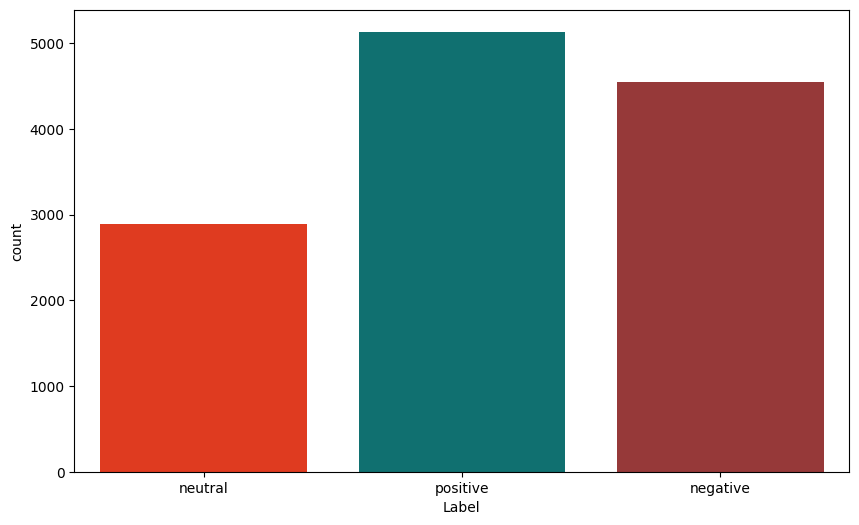

In [20]:
plt.figure(figsize=(10, 6))

Toxic_count = df_train['Label'].value_counts()
sns.countplot(x='Label', data=df_train, palette=['#FF2400', 'teal','#A52A2A','Seagreen'])

new_labels = class_names
plt.gca().set_xticklabels(new_labels)

plt.show()

In [21]:
from imblearn.over_sampling import RandomOverSampler

X_train=df_train['Data']
y_train=df_train['Label']
X_train_reshaped = X_train.values.reshape(-1, 1)

random_over_sampler = RandomOverSampler(sampling_strategy='auto', random_state=42)

X_resampled, y_resampled = random_over_sampler.fit_resample(X_train_reshaped, y_train)


df_train = pd.DataFrame({'Data': X_resampled.flatten(), 'Label': y_resampled})

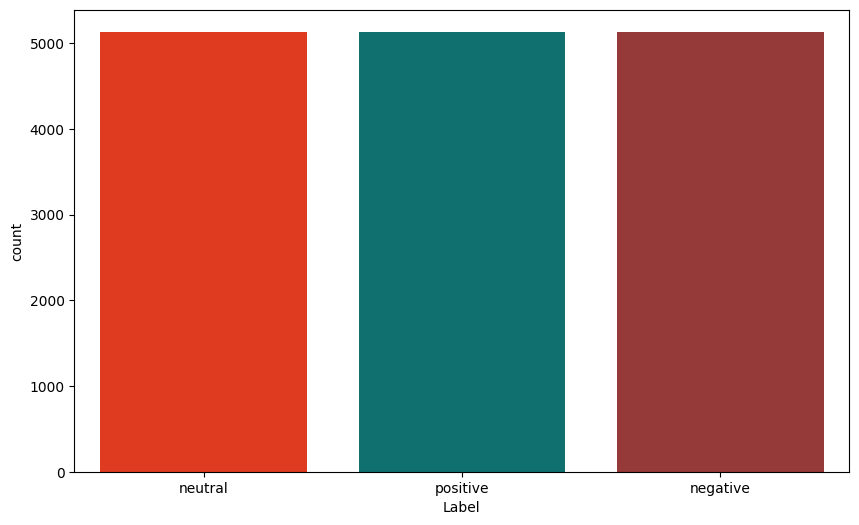

In [22]:
plt.figure(figsize=(10, 6))

Toxic_count = df_train['Label'].value_counts()
sns.countplot(x='Label', data=df_train, palette=['#FF2400', 'teal','#A52A2A','Seagreen'])

new_labels = class_names
plt.gca().set_xticklabels(new_labels)

plt.show()

In [23]:
!!git clone https://github.com/csebuetnlp/normalizer
!pip install ./normalizer

Processing ./normalizer
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 185.0/185.0 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.2/64.2 kB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for normalizer: filename=normalizer-0.0.1-py3-none-any.whl size=6859 sha256=e20b08945a03e999c6e7aa56c7345956e7f9bda2cfea2250e77f11cab0f631b4
  Stored in directory: /tmp/pip-ephem-wheel-cache-s9gq95q3/wheels/91/31/ac/cb0dc5e17233add0c7fb4a15abf51b9ab93a5a264263543bb0
  Created wheel for emoji: filename=emoji-1.4.2-py3-none-any.whl size=186459 sha256=c8fde7713b9ad61c8270af3a324bc7b11111c2140d394b518cebc328efef4065
  Stored in directory: /root/.cache/pip/wheels/10/f0/fd/4813b1177405693e8da9cdea839f0fb64fde161380e058c827
  Created wheel for ftfy: filename=ftfy-6.0.3-py3-none-any.whl size=41930 sha256=7f71eb4c9badea015eaea18876d2b9afc88ecb5f73c6ab557815babd8d6b5f35
  Stor

In [24]:
import pandas as pd
import numpy as np
from normalizer import normalize
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding
from keras.optimizers import SGD
from sklearn.metrics import classification_report

In [25]:
train1 = df_train
valid1 = df_val
embedding_dim = 300
trunc_type = 'post'
oov_tok = "<OOV>"

training_sentences = np.array([normalize(sentence) for sentence in train1['Data'].values])
valid_sentences = np.array([normalize(sentence) for sentence in valid1['Data'].values])
total_vocab_size = len(set([word for sentence in training_sentences for word in sentence.split()]))
vocab_size_percentage = 0.9
vocab_size = int(total_vocab_size * vocab_size_percentage)
vocab_size += 1
print(f"Calculated Vocabulary Size: {vocab_size}")
sentence_lengths = [len(sentence.split()) for sentence in training_sentences]
max_length_percentile = 95
max_length = int(np.percentile(sentence_lengths, max_length_percentile))
print(f"Calculated Max Sequence Length: {max_length}")

train_labels = keras.utils.to_categorical(train1['Label'].values)
valid_labels = keras.utils.to_categorical(valid1['Label'].values)

Calculated Vocabulary Size: 21691
Calculated Max Sequence Length: 36


In [26]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

sequences_train = tokenizer.texts_to_sequences(training_sentences)
padded_train = pad_sequences(sequences_train, maxlen=max_length, truncating=trunc_type)

sequences_valid = tokenizer.texts_to_sequences(valid_sentences)
padded_valid = pad_sequences(sequences_valid, maxlen=max_length)

In [27]:
import tensorflow as tf

In [28]:
model=Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length))
model.add(LSTM(50))
model.add(Dense(3, activation='softmax'))

initial_learning_rate = 2e-5
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=10000,
    decay_rate=0.96,
    staircase=True
)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule, epsilon=1e-6)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [29]:
history = model.fit(padded_train, train_labels, epochs=30, batch_size=64, validation_data=(padded_valid, valid_labels))

Epoch 1/30
241/241 [==============================] - 42s 159ms/step - loss: 1.0934 - accuracy: 0.4067 - val_loss: 1.0926 - val_accuracy: 0.3671
Epoch 2/30
241/241 [==============================] - 7s 28ms/step - loss: 1.0824 - accuracy: 0.4592 - val_loss: 1.0855 - val_accuracy: 0.3981
Epoch 3/30
241/241 [==============================] - 6s 23ms/step - loss: 1.0666 - accuracy: 0.4931 - val_loss: 1.0701 - val_accuracy: 0.4416
Epoch 4/30
241/241 [==============================] - 3s 14ms/step - loss: 1.0404 - accuracy: 0.5248 - val_loss: 1.0346 - val_accuracy: 0.5062
Epoch 5/30
241/241 [==============================] - 3s 11ms/step - loss: 0.9885 - accuracy: 0.5668 - val_loss: 0.9571 - val_accuracy: 0.5558
Epoch 6/30
241/241 [==============================] - 4s 15ms/step - loss: 0.9090 - accuracy: 0.5993 - val_loss: 0.8697 - val_accuracy: 0.5988
Epoch 7/30
241/241 [==============================] - 3s 11ms/step - loss: 0.8469 - accuracy: 0.6211 - val_loss: 0.8069 - val_accuracy: 0.63

In [30]:
predictions = model.predict(padded_valid)
predicted_labels = np.argmax(predictions, axis=1)

print(classification_report(np.argmax(valid_labels, axis=1), predicted_labels))

61/61 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       439
           1       0.94      0.93      0.93       796
           2       0.97      0.91      0.94       699

    accuracy                           0.91      1934
   macro avg       0.90      0.91      0.90      1934
weighted avg       0.92      0.91      0.91      1934



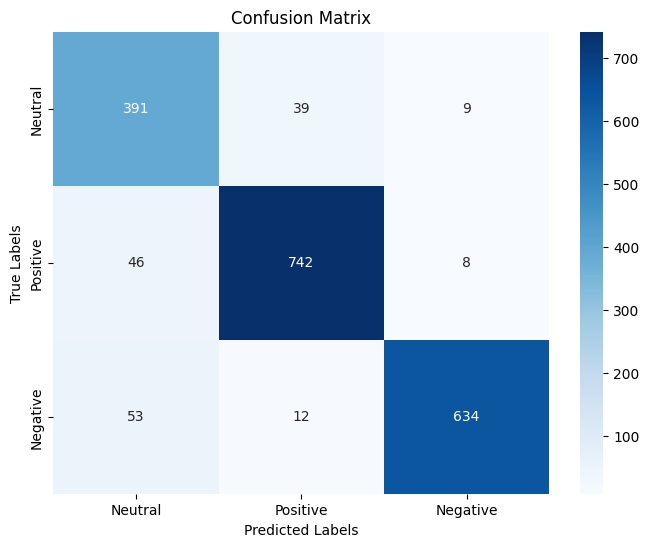

In [31]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(np.argmax(valid_labels, axis=1), predicted_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d',
            xticklabels=['Neutral', 'Positive','Negative'],
            yticklabels=['Neutral', 'Positive','Negative'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

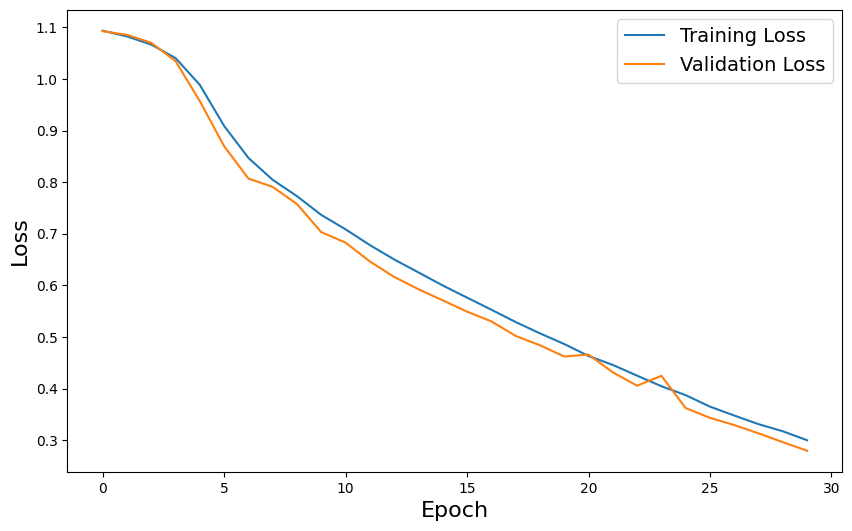

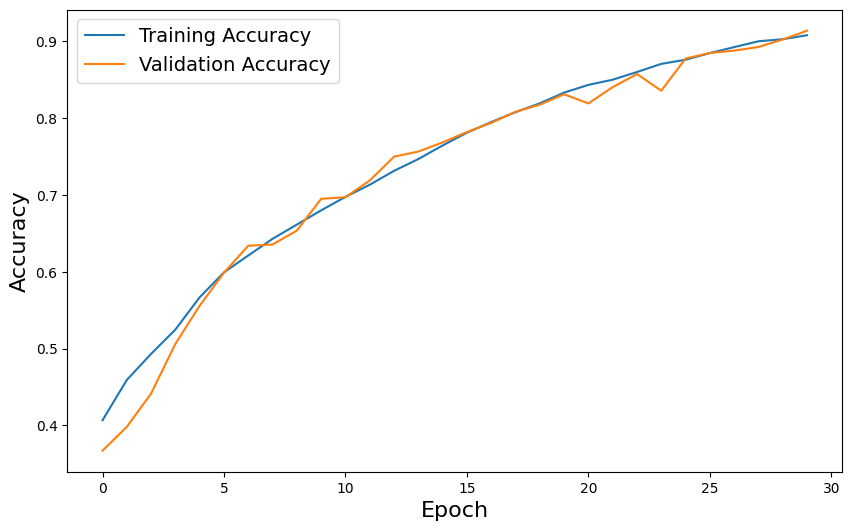

In [32]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.legend(fontsize=14)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.legend(fontsize=14)
plt.show()

In [33]:
model=Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length))
model.add(LSTM(50))
model.add(Dense(3, activation='softmax'))


optimizer = keras.optimizers.RMSprop(
    learning_rate=2e-5,
    rho=0.9,
    momentum=0.8,
    epsilon=1e-07,
    centered=False
)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])



In [34]:
history = model.fit(padded_train, train_labels, epochs=30, batch_size=64, validation_data=(padded_valid, valid_labels))

Epoch 1/30
241/241 [==============================] - 20s 74ms/step - loss: 1.0873 - accuracy: 0.4153 - val_loss: 1.0868 - val_accuracy: 0.4080
Epoch 2/30
241/241 [==============================] - 6s 23ms/step - loss: 1.0490 - accuracy: 0.5046 - val_loss: 1.0303 - val_accuracy: 0.5010
Epoch 3/30
241/241 [==============================] - 4s 18ms/step - loss: 0.9612 - accuracy: 0.5559 - val_loss: 0.9087 - val_accuracy: 0.5993
Epoch 4/30
241/241 [==============================] - 3s 13ms/step - loss: 0.8961 - accuracy: 0.5887 - val_loss: 0.8816 - val_accuracy: 0.6019
Epoch 5/30
241/241 [==============================] - 3s 12ms/step - loss: 0.8469 - accuracy: 0.6250 - val_loss: 0.8216 - val_accuracy: 0.6272
Epoch 6/30
241/241 [==============================] - 2s 9ms/step - loss: 0.7972 - accuracy: 0.6563 - val_loss: 0.7573 - val_accuracy: 0.6748
Epoch 7/30
241/241 [==============================] - 4s 16ms/step - loss: 0.7441 - accuracy: 0.6893 - val_loss: 0.7073 - val_accuracy: 0.6960

In [35]:
predictions = model.predict(padded_valid)
predicted_labels = np.argmax(predictions, axis=1)

print(classification_report(np.argmax(valid_labels, axis=1), predicted_labels))

61/61 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       439
           1       0.97      0.95      0.96       796
           2       0.98      0.95      0.96       699

    accuracy                           0.95      1934
   macro avg       0.94      0.95      0.94      1934
weighted avg       0.95      0.95      0.95      1934



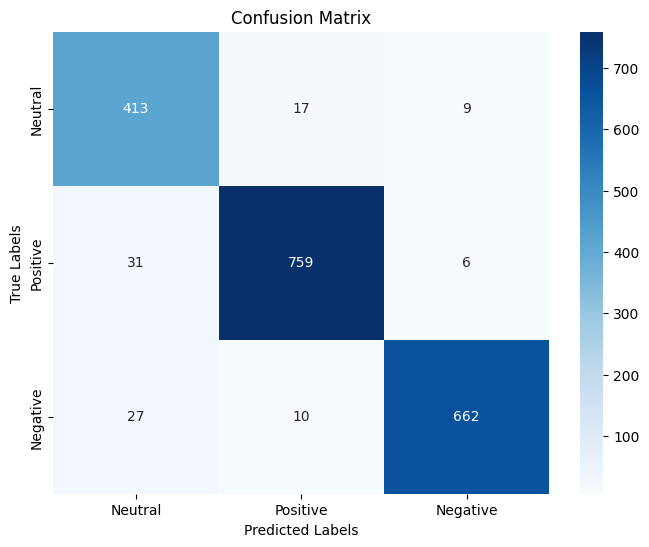

In [36]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(np.argmax(valid_labels, axis=1), predicted_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d',
            xticklabels=['Neutral', 'Positive','Negative'],
            yticklabels=['Neutral', 'Positive','Negative'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

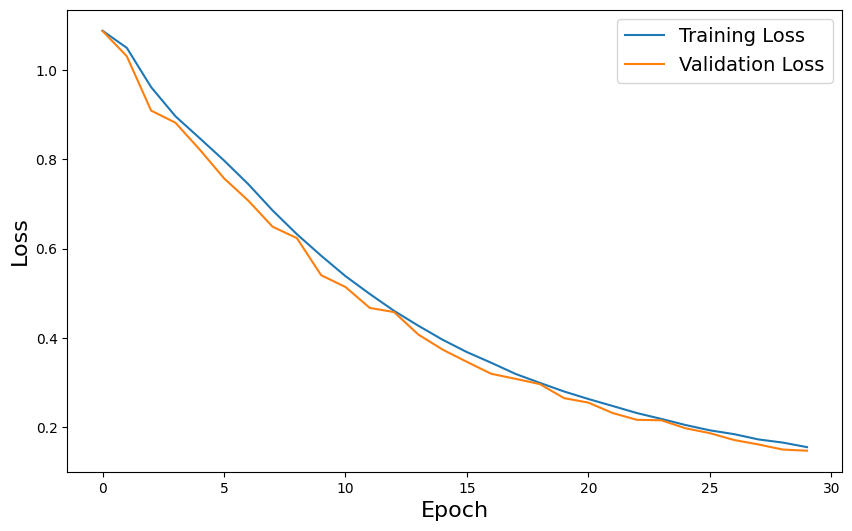

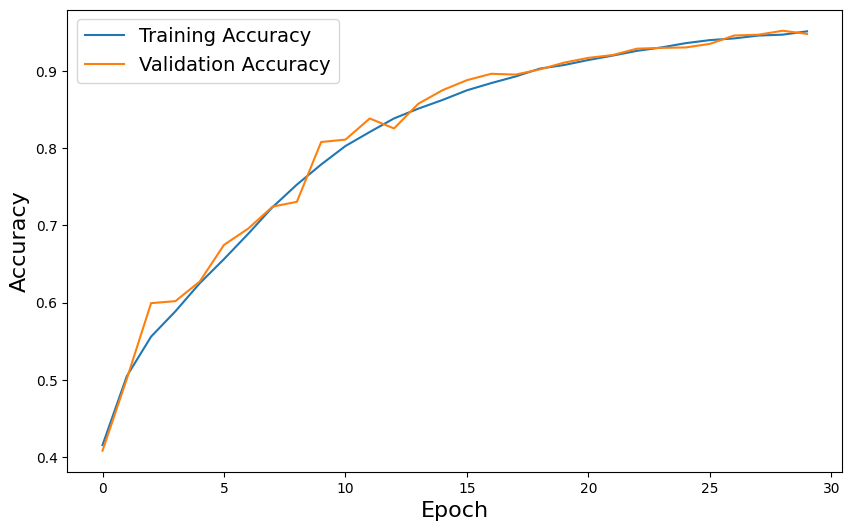

In [37]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.legend(fontsize=14)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.legend(fontsize=14)
plt.show()

In [38]:
from tensorflow.keras.layers import Bidirectional

In [39]:
model=Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length))
model.add(Bidirectional(LSTM(50)))
model.add(Dense(3, activation='softmax'))


optimizer = keras.optimizers.RMSprop(
    learning_rate=2e-5,
    rho=0.9,
    momentum=0.8,
    epsilon=1e-07,
    centered=False
)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])



In [40]:
history = model.fit(padded_train, train_labels, epochs=30, batch_size=64, validation_data=(padded_valid, valid_labels))

Epoch 1/30
241/241 [==============================] - 23s 81ms/step - loss: 1.0904 - accuracy: 0.4020 - val_loss: 1.0861 - val_accuracy: 0.4240
Epoch 2/30
241/241 [==============================] - 10s 41ms/step - loss: 1.0643 - accuracy: 0.4853 - val_loss: 1.0522 - val_accuracy: 0.4809
Epoch 3/30
241/241 [==============================] - 6s 25ms/step - loss: 1.0050 - accuracy: 0.5319 - val_loss: 0.9497 - val_accuracy: 0.5693
Epoch 4/30
241/241 [==============================] - 3s 11ms/step - loss: 0.9251 - accuracy: 0.5712 - val_loss: 0.8902 - val_accuracy: 0.5863
Epoch 5/30
241/241 [==============================] - 3s 12ms/step - loss: 0.8753 - accuracy: 0.5989 - val_loss: 0.8340 - val_accuracy: 0.6225
Epoch 6/30
241/241 [==============================] - 3s 14ms/step - loss: 0.8312 - accuracy: 0.6256 - val_loss: 0.7918 - val_accuracy: 0.6443
Epoch 7/30
241/241 [==============================] - 3s 11ms/step - loss: 0.7860 - accuracy: 0.6562 - val_loss: 0.7865 - val_accuracy: 0.65

In [41]:
predictions = model.predict(padded_valid)
predicted_labels = np.argmax(predictions, axis=1)

print(classification_report(np.argmax(valid_labels, axis=1), predicted_labels))

61/61 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       439
           1       0.97      0.95      0.96       796
           2       0.96      0.96      0.96       699

    accuracy                           0.95      1934
   macro avg       0.94      0.95      0.95      1934
weighted avg       0.95      0.95      0.95      1934



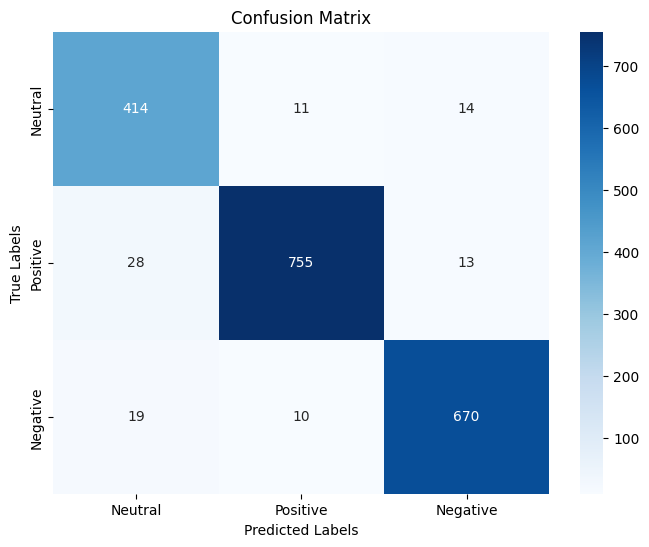

In [42]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(np.argmax(valid_labels, axis=1), predicted_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d',
            xticklabels=['Neutral', 'Positive','Negative'],
            yticklabels=['Neutral', 'Positive','Negative'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

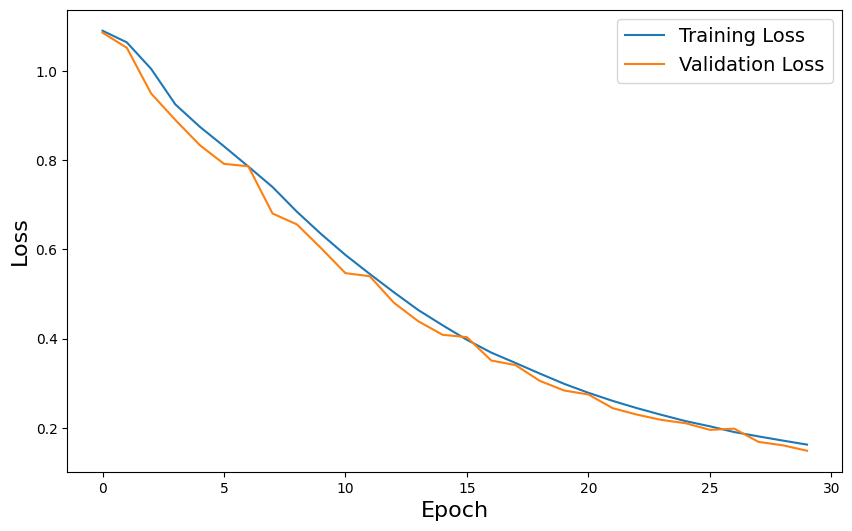

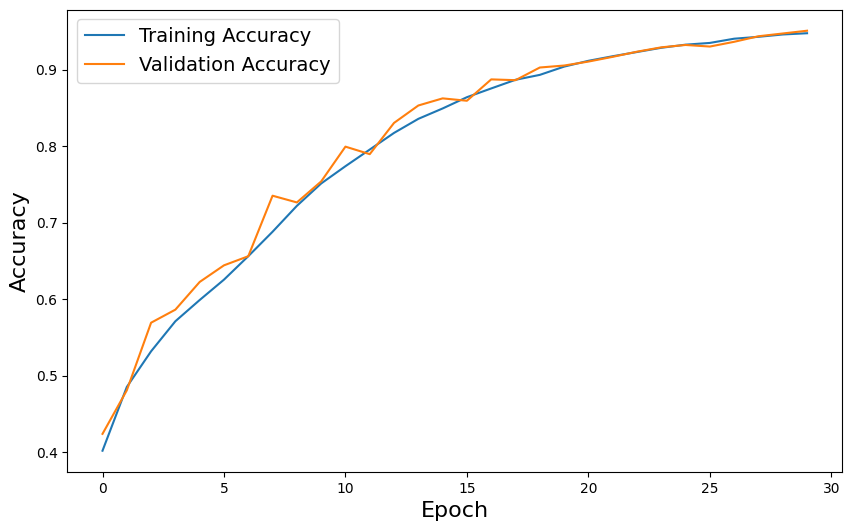

In [43]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.legend(fontsize=14)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.legend(fontsize=14)
plt.show()

Epoch 1/5
241/241 [==============================] - 17s 63ms/step - loss: 1.0976 - accuracy: 0.3413 - val_loss: 1.0981 - val_accuracy: 0.3438
Epoch 2/5
241/241 [==============================] - 5s 21ms/step - loss: 1.0970 - accuracy: 0.3563 - val_loss: 1.0978 - val_accuracy: 0.3532
Epoch 3/5
241/241 [==============================] - 4s 15ms/step - loss: 1.0965 - accuracy: 0.3783 - val_loss: 1.0976 - val_accuracy: 0.3547
Epoch 4/5
241/241 [==============================] - 2s 9ms/step - loss: 1.0959 - accuracy: 0.3874 - val_loss: 1.0974 - val_accuracy: 0.3537
Epoch 5/5
241/241 [==============================] - 2s 10ms/step - loss: 1.0954 - accuracy: 0.4004 - val_loss: 1.0971 - val_accuracy: 0.3557
0.35573941469192505
Adagrad
61/61 [==============================] - 0s 2ms/step


for optimizer: Adagrad
              precision    recall  f1-score   support

           0       0.26      0.63      0.37       439
           1       0.49      0.33      0.39       796
           2       0.

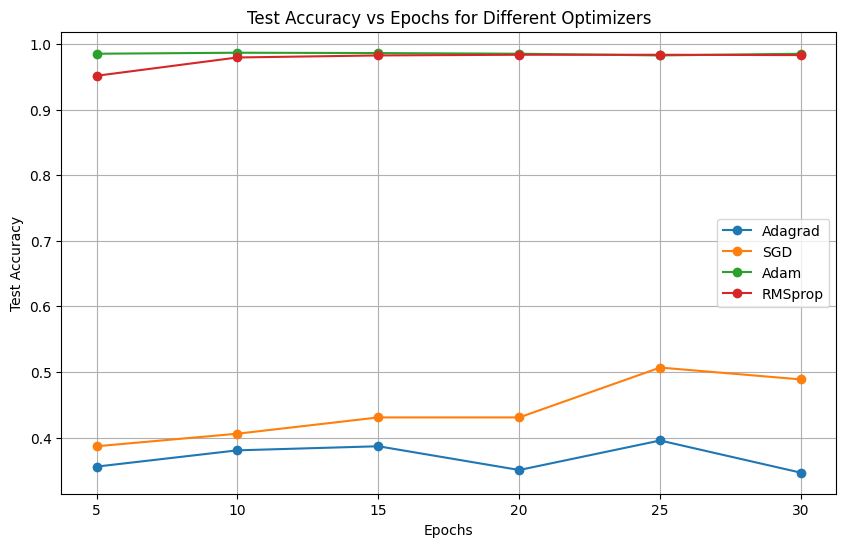

In [44]:
import matplotlib.pyplot as plt
def build_model(optimizer):
    model=Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length))
    model.add(LSTM(50))
    model.add(Dense(3, activation='softmax'))
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

optimizers = [ 'Adagrad','SGD','Adam', 'RMSprop']
epochs = [5, 10, 15, 20, 25, 30]

plt.figure(figsize=(10, 6))

f_a=0
f_model=build_model('adam')
h=0

for opt in optimizers:
    acc_values = []
    for epoch in epochs:
        model = build_model(opt)
        history = model.fit(padded_train, train_labels, epochs=epoch, batch_size=64, validation_data=(padded_valid, valid_labels))
        _, test_accuracy = model.evaluate(padded_valid, valid_labels, verbose=0)
        print(test_accuracy)
        print(opt)
        if f_a<=test_accuracy:
          f_a=test_accuracy
          f_model=model
          h=history

        acc_values.append(test_accuracy)
        predictions = model.predict(padded_valid)
        predicted_labels = np.argmax(predictions, axis=1)
        print()
        print()
        print("for optimizer: "+opt)
        print(classification_report(np.argmax(valid_labels, axis=1), predicted_labels))

    plt.plot(epochs, acc_values, marker='o', label=opt)

plt.title('Test Accuracy vs Epochs for Different Optimizers')
plt.xlabel('Epochs')
plt.ylabel('Test Accuracy')
plt.legend()
plt.grid(True)
plt.show()

Epoch 1/5
241/241 [==============================] - 14s 44ms/step - loss: 1.0993 - accuracy: 0.3183 - val_loss: 1.0974 - val_accuracy: 0.3619
Epoch 2/5
241/241 [==============================] - 3s 14ms/step - loss: 1.0986 - accuracy: 0.3348 - val_loss: 1.0990 - val_accuracy: 0.3201
Epoch 3/5
241/241 [==============================] - 3s 11ms/step - loss: 1.0981 - accuracy: 0.3596 - val_loss: 1.0998 - val_accuracy: 0.2978
Epoch 4/5
241/241 [==============================] - 3s 13ms/step - loss: 1.0977 - accuracy: 0.3608 - val_loss: 1.1000 - val_accuracy: 0.2859
Epoch 5/5
241/241 [==============================] - 3s 11ms/step - loss: 1.0973 - accuracy: 0.3653 - val_loss: 1.0997 - val_accuracy: 0.2947
0.2947259545326233
Adagrad
61/61 [==============================] - 1s 3ms/step


for optimizer: Adagrad
              precision    recall  f1-score   support

           0       0.25      0.78      0.37       439
           1       0.44      0.20      0.28       796
           2       0.

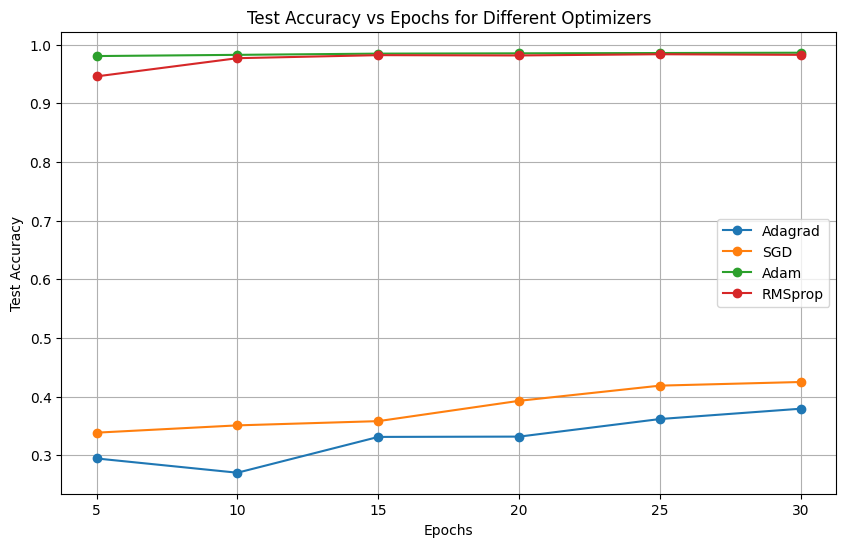

In [45]:
import matplotlib.pyplot as plt
def build_model(optimizer):
    model=Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length))
    model.add(Bidirectional(LSTM(50)))
    model.add(Dense(3, activation='softmax'))
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

optimizers = [ 'Adagrad','SGD','Adam', 'RMSprop']
epochs = [5, 10, 15, 20, 25, 30]

plt.figure(figsize=(10, 6))

f_a=0
f_model=build_model('adam')
h=0

for opt in optimizers:
    acc_values = []
    for epoch in epochs:
        model = build_model(opt)
        history = model.fit(padded_train, train_labels, epochs=epoch, batch_size=64, validation_data=(padded_valid, valid_labels))
        _, test_accuracy = model.evaluate(padded_valid, valid_labels, verbose=0)
        print(test_accuracy)
        print(opt)
        if f_a<=test_accuracy:
          f_a=test_accuracy
          f_model=model
          h=history

        acc_values.append(test_accuracy)
        predictions = model.predict(padded_valid)
        predicted_labels = np.argmax(predictions, axis=1)
        print()
        print()
        print("for optimizer: "+opt)
        print(classification_report(np.argmax(valid_labels, axis=1), predicted_labels))

    plt.plot(epochs, acc_values, marker='o', label=opt)

plt.title('Test Accuracy vs Epochs for Different Optimizers')
plt.xlabel('Epochs')
plt.ylabel('Test Accuracy')
plt.legend()
plt.grid(True)
plt.show()